# Face Detection

* Step 1: Access webcam camera
* Step 2: Create face datection program using Haarcascade method
* Step 3: Crop face image
* Step 4: Create image label as folder and saved the croped image in that folder

## Haar-cascade Deetection in OpenCV (<a href="https://towardsdatascience.com/https-medium-com-dilan-jay-face-detection-model-on-webcam-using-python-72b382699ee9"> Source </a>)

OpenCV comes with a trainer as well as a detector. OpenCV alreadt contains many pretrained classifiers for face, eyes,smile, etc. Those XML files are stored in **_opencv/data/haarcascades/_** folder.

In [20]:
# Import required library
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [3]:
# Load required XML, classifiers
faceCascade = cv2.CascadeClassifier('../detector_architectures/haarcascade_frontalface_default.xml')

# Set video source to the default webcam
video_capture = cv2.VideoCapture(0)

img_counter = 0; # Initialize counter: img_counter
# Capture the video
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
    # Convert webcam feed to Grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor = 1.5,
            minNeighbors = 5,
            minSize=(30, 30),
            flags = cv2.CASCADE_SCALE_IMAGE
            )
    # Create rectangle where faces are found
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
    # Show image
    cv2.imshow('FaceDetection', frame)
    
    # Escape method
    # ESC Pressed
    if (cv2.waitKey(33)%256 == 27):
        break
     
    # Saved image
    # SPACE pressed
    elif (cv2.waitKey(33)%256 == 32):
        img_name = "facedetect_webcam_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written".format(img_name))
        img_counter +=1
        
# Clean everything and release the capture
video_capture.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Load required XML, classifiers
faceCascade = cv2.CascadeClassifier('../detector_architectures/haarcascade_frontalface_default.xml')

# Set video source to the default webcam
video_capture = cv2.VideoCapture(0)

img_counter = 0; # Initialize counter: img_counter
# Capture the video

# Capture frame-by-frame
ret, frame = video_capture.read()
    
# Convert webcam feed to Grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [22]:
widgets.Image(value=gray)

TraitError: The 'value' trait of an Image instance must be a bytes object, but a value of array([[[153, 142, 125],
        [149, 138, 122],
        [149, 138, 124],
        ...,
        [ 71,  62,  49],
        [ 72,  63,  48],
        [ 67,  58,  43]],

       [[149, 138, 122],
        [148, 137, 120],
        [149, 138, 124],
        ...,
        [ 72,  63,  50],
        [ 71,  62,  47],
        [ 63,  54,  39]],

       [[147, 138, 122],
        [149, 140, 125],
        [150, 141, 126],
        ...,
        [ 57,  54,  32],
        [ 63,  59,  40],
        [ 56,  52,  33]],

       ...,

       [[ 57,  51,  58],
        [ 46,  41,  47],
        [ 31,  26,  32],
        ...,
        [ 18,  17,   0],
        [ 18,  17,   0],
        [ 17,  15,   0]],

       [[ 40,  35,  41],
        [ 23,  17,  24],
        [ 23,  17,  24],
        ...,
        [ 18,  19,   0],
        [ 18,  19,   0],
        [ 17,  17,   0]],

       [[ 51,  45,  52],
        [ 37,  31,  38],
        [ 36,  30,  37],
        ...,
        [ 18,  19,   0],
        [ 18,  19,   0],
        [ 18,  19,   0]]], dtype=uint8) <class 'numpy.ndarray'> was specified.

In [ ]:
n

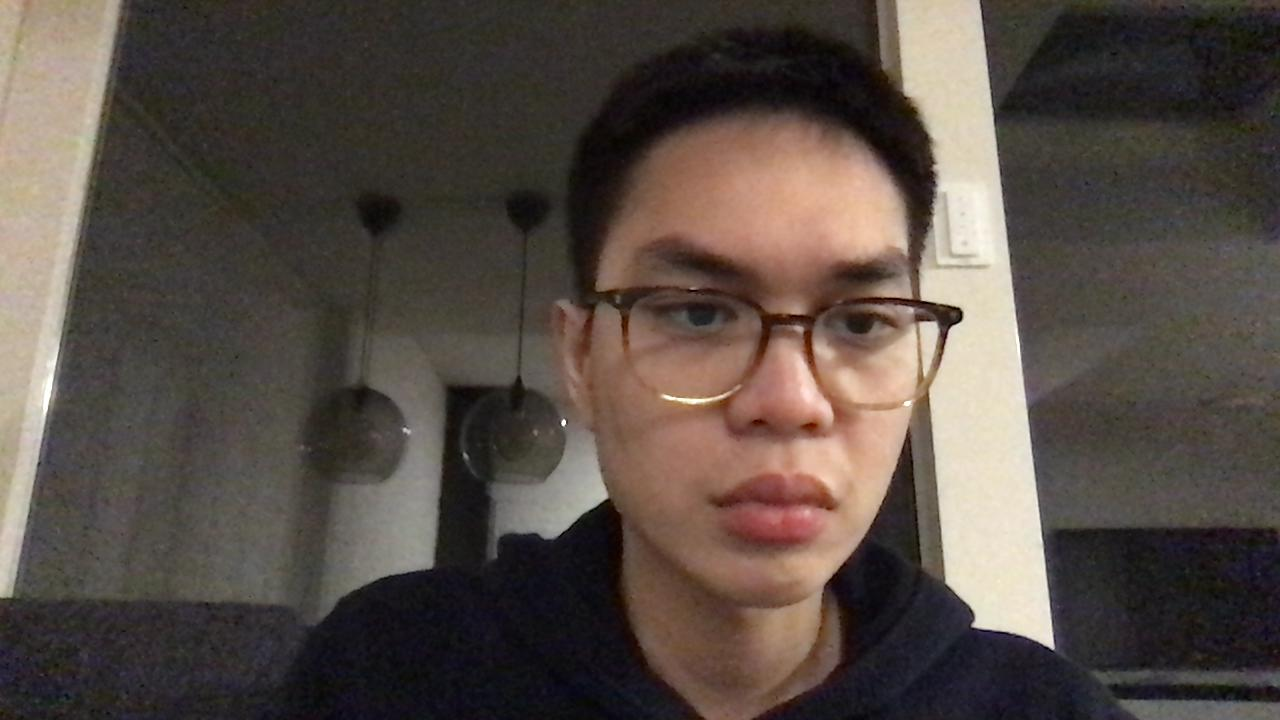

In [10]:
from io import BytesIO
from IPython.display import clear_output, Image, display
import cv2
from PIL import Image as PIL_Image

video_capture = cv2.VideoCapture(0)
try:
    while (True):
        ret, frame = video_capture.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        img = PIL_Image.fromarray(frame, "RGB")
        buffer = BytesIO()
        img.save(buffer, format="JPEG")
        display(Image(data=buffer.getvalue()))
        
        clear_output(wait=True)
except KeyboardInterrupt:
    video_capture.release()